# Machine Learning Final Project: US Presidential Election Primaries
NOTE: May be more pleasant to view using the Jupyter Notebooks NB viewer by pasting the url to this notebook here: https://nbviewer.jupyter.org/

In [1]:
import sys
import os
import re
import pandas as pd
import numpy as np

In [2]:
county_facts = pd.read_csv('county_facts.csv')

In [3]:
county_facts.set_index(county_facts['fips'])
county_facts

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
7,1011,Bullock County,AL,10764,10915,-1.4,10914,6.3,21.4,14.9,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
8,1013,Butler County,AL,20296,20946,-3.1,20947,6.1,23.6,18.0,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0
9,1015,Calhoun County,AL,115916,118586,-2.3,118572,5.7,22.2,16.0,...,0.5,24.7,2679991,0,1542981,13678,186533,114,605.87,195.7


The cell below prints out the definitions matching each county fact abbreviation.

In [4]:
county_facts_dictionary = open('county_facts_dictionary.csv', 'r')
lines = county_facts_dictionary.readlines()
for line in lines:
    
    print(line)

column_name,description

PST045214,"Population, 2014 estimate"

PST040210,"Population, 2010 (April 1) estimates base"

PST120214,"Population, percent change - April 1, 2010 to July 1, 2014"

POP010210,"Population, 2010"

AGE135214,"Persons under 5 years, percent, 2014"

AGE295214,"Persons under 18 years, percent, 2014"

AGE775214,"Persons 65 years and over, percent, 2014"

SEX255214,"Female persons, percent, 2014"

RHI125214,"White alone, percent, 2014"

RHI225214,"Black or African American alone, percent, 2014"

RHI325214,"American Indian and Alaska Native alone, percent, 2014"

RHI425214,"Asian alone, percent, 2014"

RHI525214,"Native Hawaiian and Other Pacific Islander alone, percent, 2014"

RHI625214,"Two or More Races, percent, 2014"

RHI725214,"Hispanic or Latino, percent, 2014"

RHI825214,"White alone, not Hispanic or Latino, percent, 2014"

POP715213,"Living in same house 1 year & over, percent, 2009-2013"

POP645213,"Foreign born persons, percent, 2009-2013"

POP815213,"Langua

Our country fact data are on different scales and could cause us to reach a poor fit for the models we will train. Since we cannot assume a priori that all the features are normally distributed we will instead scale each feature using: $x\rightarrow\frac{x-\min{x}}{\max{x}-\min{x}}$

In [5]:
cols = county_facts.columns.values
print(cols)

['fips' 'area_name' 'state_abbreviation' 'PST045214' 'PST040210'
 'PST120214' 'POP010210' 'AGE135214' 'AGE295214' 'AGE775214' 'SEX255214'
 'RHI125214' 'RHI225214' 'RHI325214' 'RHI425214' 'RHI525214' 'RHI625214'
 'RHI725214' 'RHI825214' 'POP715213' 'POP645213' 'POP815213' 'EDU635213'
 'EDU685213' 'VET605213' 'LFE305213' 'HSG010214' 'HSG445213' 'HSG096213'
 'HSG495213' 'HSD410213' 'HSD310213' 'INC910213' 'INC110213' 'PVY020213'
 'BZA010213' 'BZA110213' 'BZA115213' 'NES010213' 'SBO001207' 'SBO315207'
 'SBO115207' 'SBO215207' 'SBO515207' 'SBO415207' 'SBO015207' 'MAN450207'
 'WTN220207' 'RTN130207' 'RTN131207' 'AFN120207' 'BPS030214' 'LND110210'
 'POP060210']


We can ignore the first 3 columns, since that data would only be useful if we have data spanning more than one election cycle (and if we had set up a system to handle categorical features).

In [6]:
cols = cols[3:]
cols

array(['PST045214', 'PST040210', 'PST120214', 'POP010210', 'AGE135214',
       'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214',
       'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214',
       'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213',
       'EDU685213', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213',
       'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'INC910213',
       'INC110213', 'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213',
       'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207',
       'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207',
       'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214', 'LND110210',
       'POP060210'], dtype=object)

In [7]:
cf = county_facts[cols].copy() # A partial copy of county facts for us to modify.
for c in cols:
    c_max = county_facts[c].max()
    c_min = county_facts[c].min()
    #print(c_max)
    #print(c_min)
    cf[c] = (cf[c] - c_min)/(c_max - c_min)
cf

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,1.000000,1.000000,0.225806,1.000000,0.452555,0.550000,0.274102,0.894366,0.779456,0.155112,...,0.106410,0.512456,1.000000,1.000000,1.000000,0.160767,1.000000e+00,1.000000e+00,1.000000,0.001258
1,0.015209,0.015482,0.204672,0.015481,0.445255,0.542857,0.289225,0.906690,0.701913,0.313749,...,0.015385,0.500000,0.021216,0.012518,0.014638,0.153020,1.046984e-02,1.277664e-02,0.014339,0.001359
2,0.000174,0.000177,0.205784,0.000176,0.437956,0.600000,0.260870,0.904930,0.784491,0.219741,...,0.008974,0.564057,0.000000,0.000000,0.000153,0.148552,1.436260e-04,1.251956e-04,0.000168,0.001321
3,0.000628,0.000590,0.298109,0.000590,0.408759,0.528571,0.353497,0.901408,0.877140,0.112808,...,0.016667,0.485765,0.000265,0.000000,0.000757,0.212450,7.118899e-04,1.322677e-03,0.000450,0.001650
4,0.000084,0.000089,0.165740,0.000089,0.416058,0.504762,0.311909,0.820423,0.505539,0.559342,...,0.000000,0.480427,0.000000,0.000000,0.000048,0.078391,0.000000e+00,7.645530e-06,0.000250,0.000446
5,0.000071,0.000074,0.169077,0.000074,0.386861,0.500000,0.279773,0.808099,0.768379,0.259694,...,0.000000,0.000000,0.000000,0.000000,0.000032,0.071832,1.752537e-05,1.815813e-05,0.000176,0.000530
6,0.000181,0.000186,0.196885,0.000185,0.445255,0.561905,0.321361,0.889085,0.966767,0.021152,...,0.000000,0.412811,0.000064,0.000000,0.000082,0.069579,3.411721e-05,2.867074e-06,0.000182,0.001280
7,0.000034,0.000035,0.173526,0.000035,0.459854,0.509524,0.281664,0.797535,0.270896,0.823737,...,0.000000,0.690391,0.000000,0.000000,0.000011,0.049443,5.979188e-06,9.556913e-07,0.000176,0.000252
8,0.000064,0.000068,0.154616,0.000068,0.445255,0.561905,0.340265,0.943662,0.542800,0.517039,...,0.000000,0.000000,0.000075,0.000014,0.000059,0.140173,4.631345e-05,1.911383e-06,0.000219,0.000389
9,0.000364,0.000384,0.163515,0.000384,0.416058,0.528571,0.302457,0.911972,0.763343,0.247944,...,0.006410,0.439502,0.000504,0.000000,0.000394,0.169282,3.039008e-04,1.089488e-04,0.000171,0.002817


In [12]:
paramdict = {} #dictionary so we can print actual parameter titles, not abbreviations
params_index_dict = {} # dictionary to get feature indices in sample.
factdict = {} #keeps track of parameters associated with a county ID number
trainX = [] #list of X vectors of the training data
trainY = [] #list of Y output of the training data
testX = [] #list of X vectors of the testing data
testY = [] #list of Y output of the testing data

def read_facts(filename):
  f = open(filename, 'r')
  p = re.compile(',')
  f.readline()
  f.readline()
  for l in f:
    value = p.split(l.strip())
    key = value.pop(0)
    #print key
    if len(value[1]) < 1: #gets rid of rows for just states
      continue
    value.pop(0)
    value.pop(0)
    factdict[key] = [float(x) for x in value]
    
def read_param(filename):
  f = open(filename, 'r')
  p = re.compile(',')
  f.readline()
  for l in f:
    list = p.split(l.strip())
    paramdict[list[0]] = list[1]

def train_results(filename):
  f = open(filename, 'r')
  p = re.compile(',')
  params = f.readline().split(',')[2:]
  param_index_dict = {}
  for i in range(len(params)):
    param_index_dict[params[i]] = i
  for l in f:
    example = p.split(l.strip())
    trainX.append(factdict.get(example[2][:-2]))
    trainY.append(example[4])

def test_results(filename):
  f = open(filename, 'r')
  p = re.compile(',')
  for l in f:
    #print l
    example = p.split(l.strip())
    #print example[2][:-2]
    testX.append(factdict.get(example[2][:-2]))
    testY.append(example[4])

def preprocess(X,y):
  # Verify X and y are same length.
  if(len(X) != len(y)):
    print('Sample features and results must be same length')
    sys.exit()
  # Remove entries that are NoneType
  tempX = []
  tempY = []
  for i in range(len(X)):
    if( not X[i]):
      continue
    tempX.append([float(x) for x in X[i]])
    tempY.append(float(y[i]))
  X = tempX[:]
  y = tempY[:]
  maxs = [0.0] * len(X[0])
  mins = [0.0] * len(X[0])
  for i in range(len(X)):
    for j in range(len(X[i])):
      maxs[j] = max(maxs[j], X[i][j])
      mins[j] = min(mins[j], X[i][j])
  for i in range(len(X)):
    for j in range(len(X[i])):
      X[i][j] = (X[i][j] - mins[j])/(maxs[j] - mins[j])
  X = np.array(X)
  y = np.array(y)
  return X, y

import math
def obs_acc_freq(target, predictions, box_size=0.025):
    pred_labels = [predictions[i][1] for i in range(len(predictions))]
    predictions = [predictions[i][0] for i in range(len(predictions))]
    for i in range(len(predictions)):
        if(len(target) != len(predictions[i])):
            print('Error, target vector and prediction vector have different lengths')
            return None
    boxes = [[(round(box_size* i,3), round(box_size*(i+1),3)),[0]*len(predictions),0] for i in range(math.ceil(1.0/box_size))]
    for i in range(len(target)):
        for j in range(len(predictions)):
            l1_error = abs(target[i] - predictions[j][i])
            assignment = math.floor(l1_error / box_size)
            boxes[assignment][1][j] += 1
        bl_l1_error = abs(target[i] - 0.5)
        assignment = math.floor(bl_l1_error / box_size)
        boxes[assignment][2] += 1
    c = ['Dist True', 'Baseline']
    for i in range(len(pred_labels)):
        c.append(pred_labels[i])
    for i in range(len(boxes)):
        temp = boxes[i]
        boxes[i] = [boxes[i][0], boxes[i][2]]
        for j in range(len(predictions)):
            boxes[i].append(temp[1][j])
    df = pd.DataFrame(boxes, columns=c)
    df = df.set_index(c[0])
    return df

Next we want to associate each vector of county features with the percentage of the vote won by Hilary Clinton in the 2016 presidential primary.

In [13]:
read_param('county_facts_dictionary.csv')
read_facts('county_facts.csv')
#NOTE: temporary training data, until final is parsed.
train_results('temp_trump_train.csv')
test_results('temp_trump_test.csv')

After several rounds of trial and error we found that both logistic regression and SVR models were failing to converge in a reasonable amount of time. Thus, we looked at the weight vectors and bias, which indicated that the different magnitudes of our feature set required that we scale our feature vectors.


In [14]:
trainX, trainY = preprocess(trainX,trainY)
testX, testY = preprocess(testX,testY)
print(np.shape(trainX))
print(np.shape(trainY))
print(np.shape(testX))
print(np.shape(testY))
print(paramdict)


(2019, 51)
(2019,)
(691, 51)
(691,)
{'RHI625214': '"Two or More Races', 'WTN220207': '"Merchant wholesaler sales', 'HSG445213': '"Homeownership rate', 'PVY020213': '"Persons below poverty level', 'POP815213': '"Language other than English spoken at home', 'POP060210': '"Population per square mile', 'AFN120207': '"Accommodation and food services sales', 'AGE135214': '"Persons under 5 years', 'HSG495213': '"Median value of owner-occupied housing units', 'PST120214': '"Population', 'SBO515207': '"Native Hawaiian- and Other Pacific Islander-owned firms', 'POP010210': '"Population', 'INC110213': '"Median household income', 'RHI225214': '"Black or African American alone', 'RHI825214': '"White alone', 'PST040210': '"Population', 'MAN450207': '"Manufacturers shipments', 'RHI725214': '"Hispanic or Latino', 'HSD410213': '"Households', 'RHI525214': '"Native Hawaiian and Other Pacific Islander alone', 'SBO001207': '"Total number of firms', 'BPS030214': '"Building permits', 'VET605213': '"Veterans'

# Adding Features
While inspecting our data we realized some features are given as total counts in a county rather than as a percentage of the population, which would be more indicative of county's demographic makeup. Thus we created some additional features using existing features in the data.

# Exploration:
Here we look at the various features to determine which features are useful beyond applying domain knowledge.
We also look for variables that appear to have a normal distribution, which we could standardize.

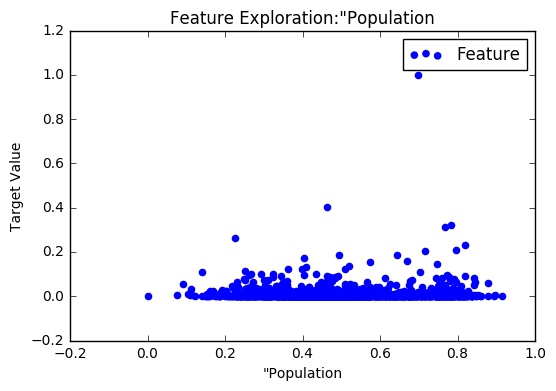

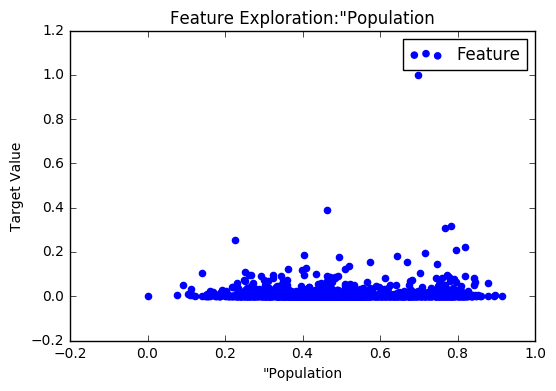

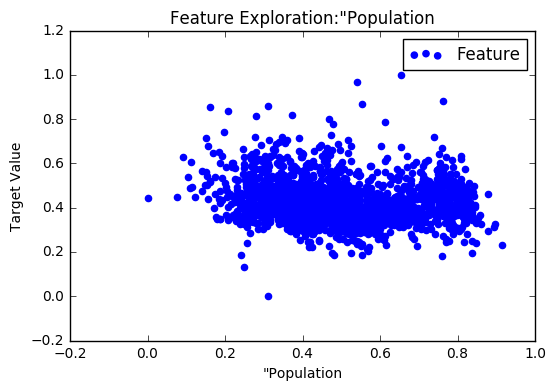

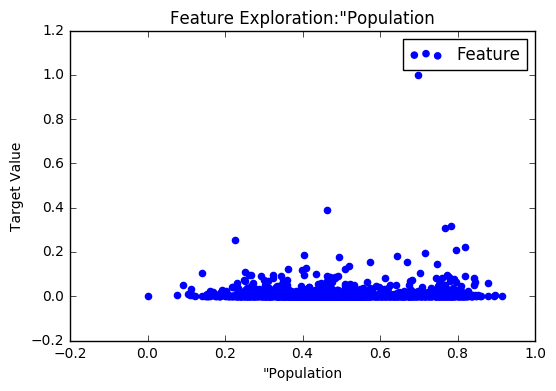

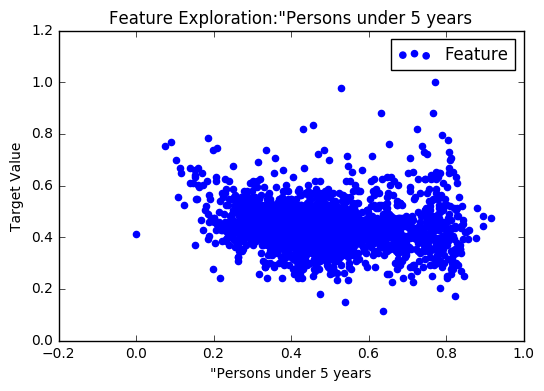

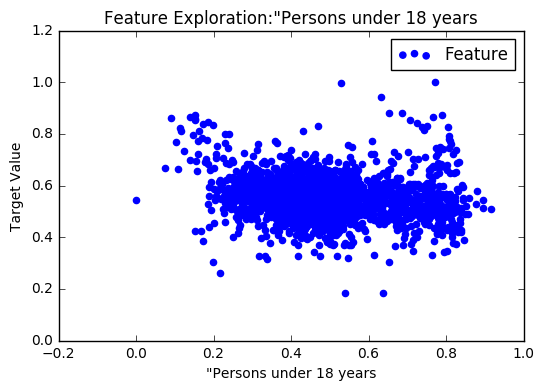

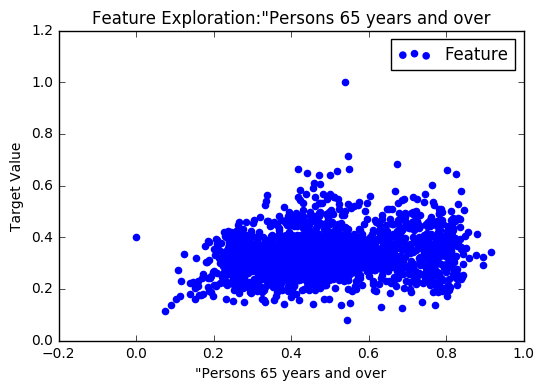

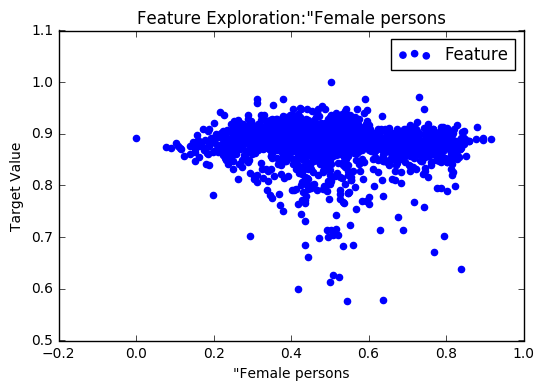

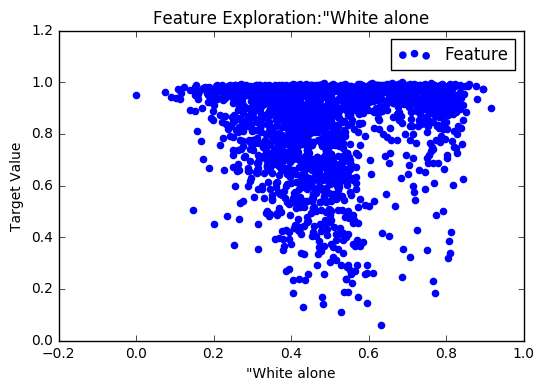

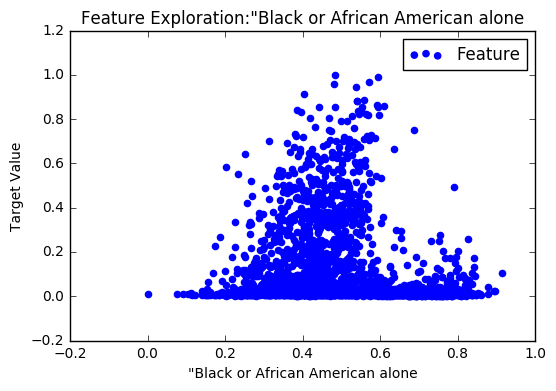

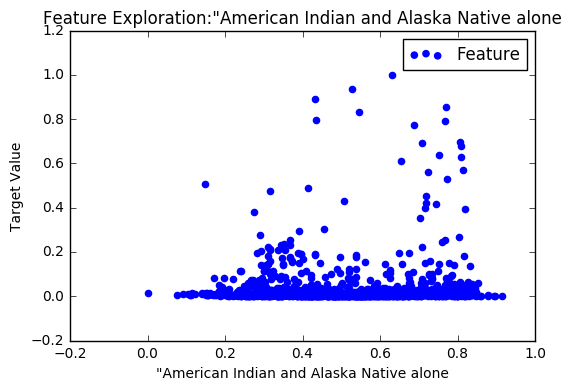

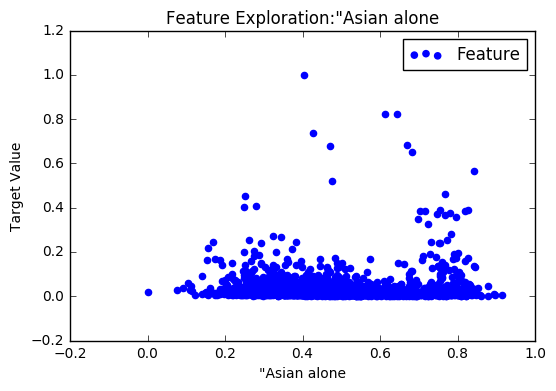

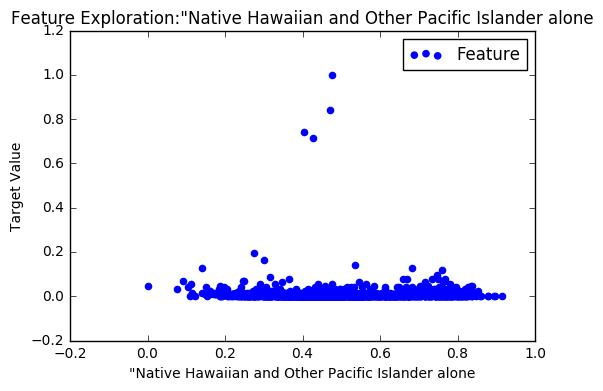

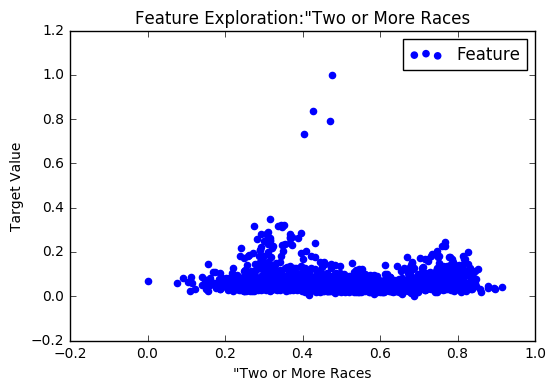

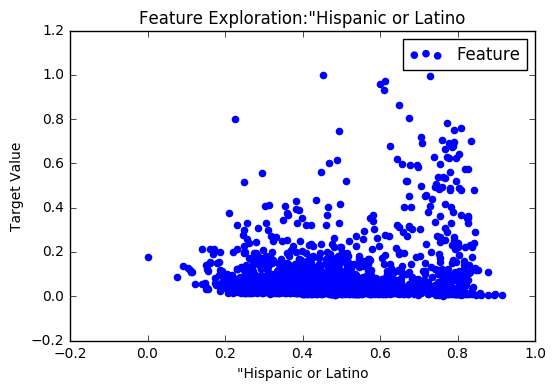

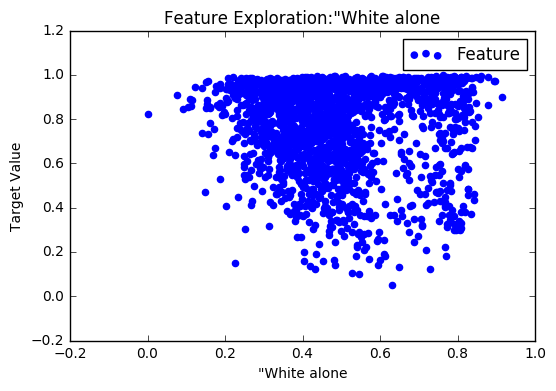

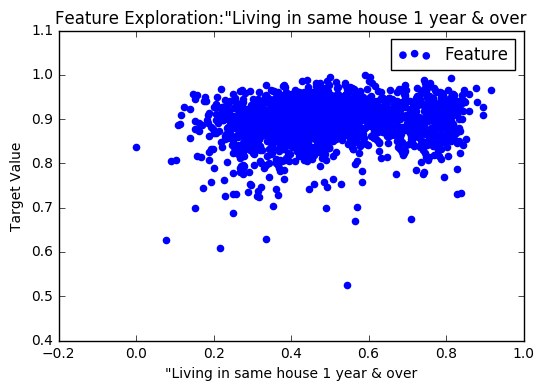

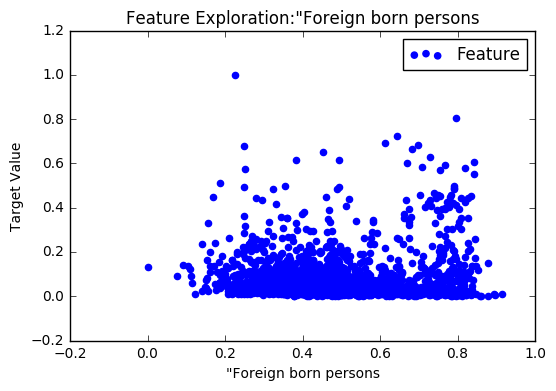

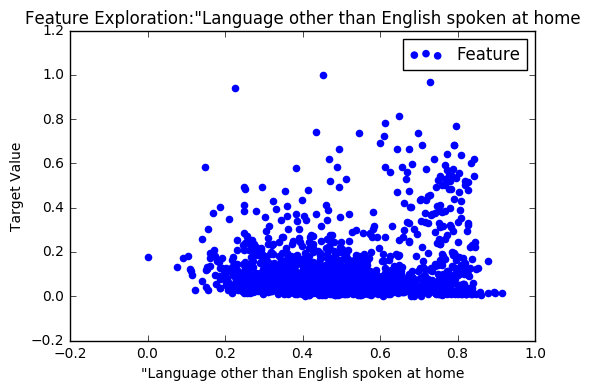

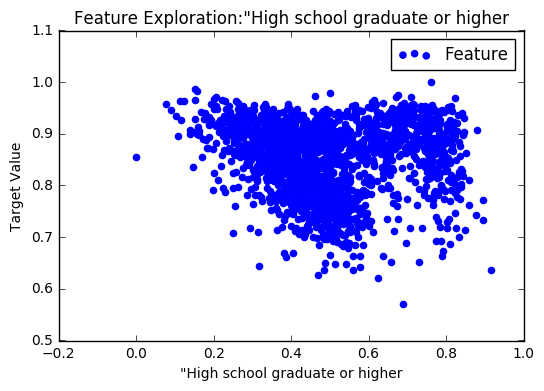

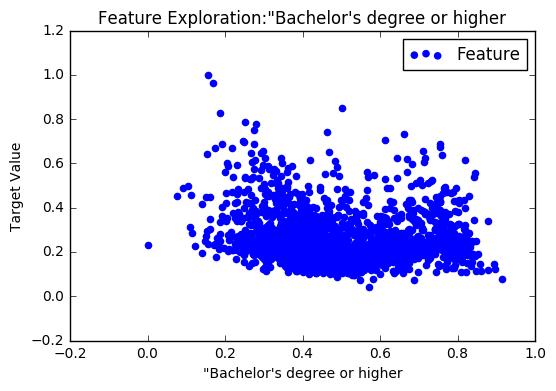

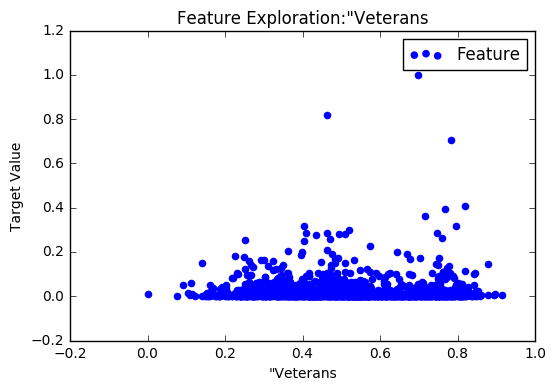

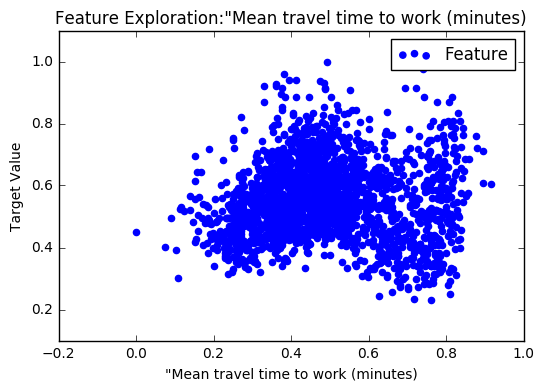

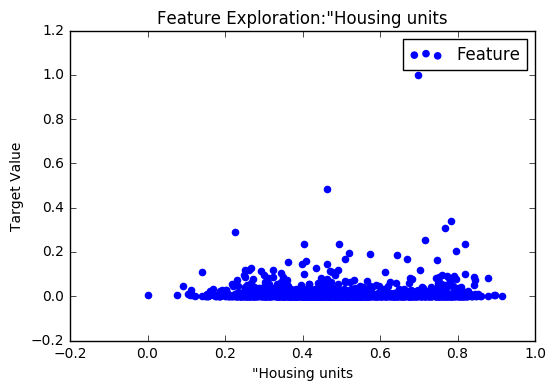

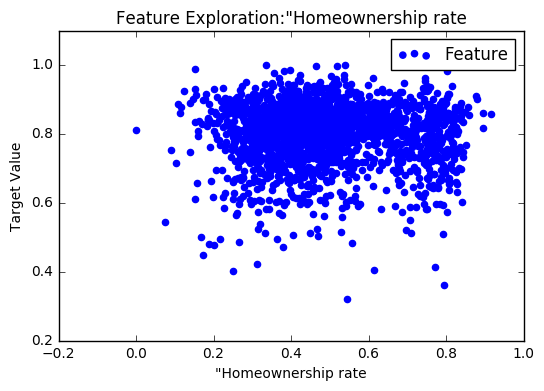

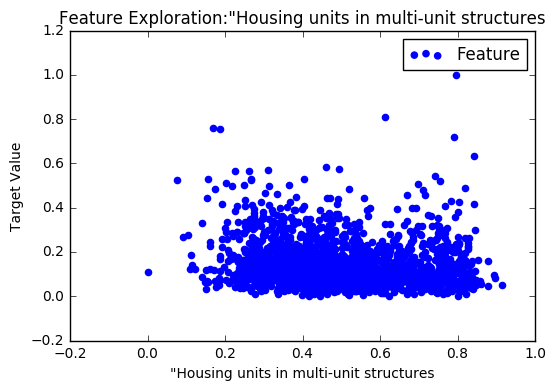

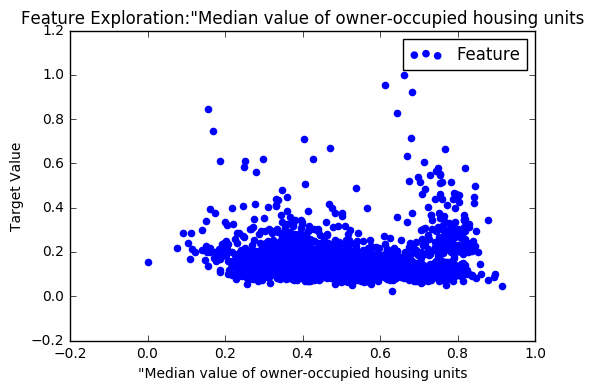

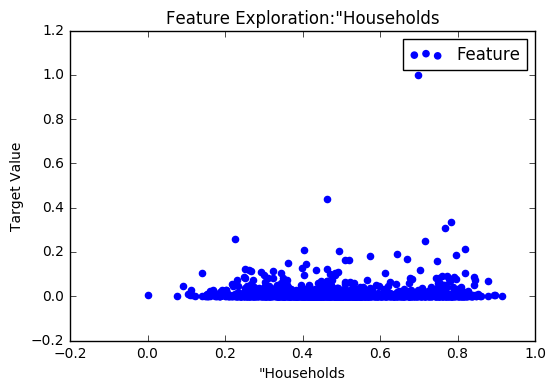

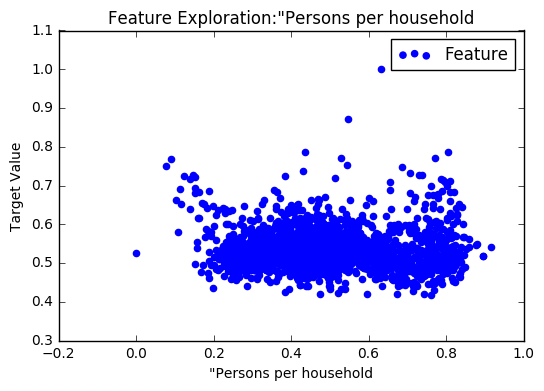

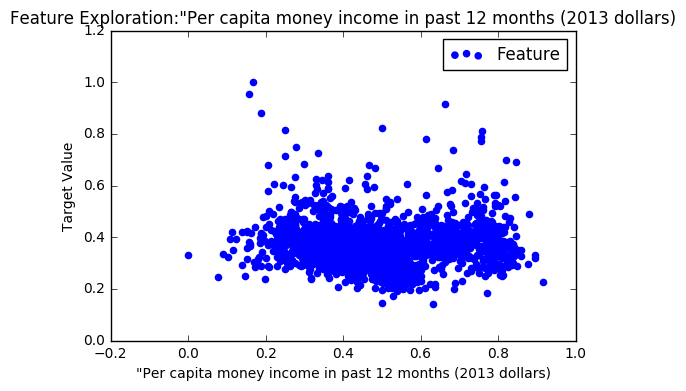

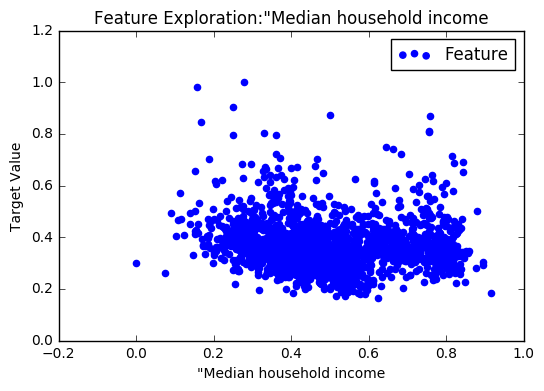

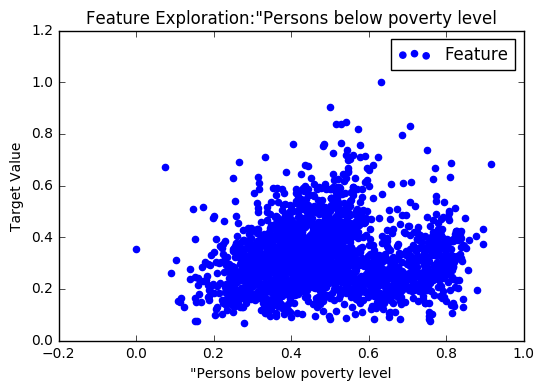

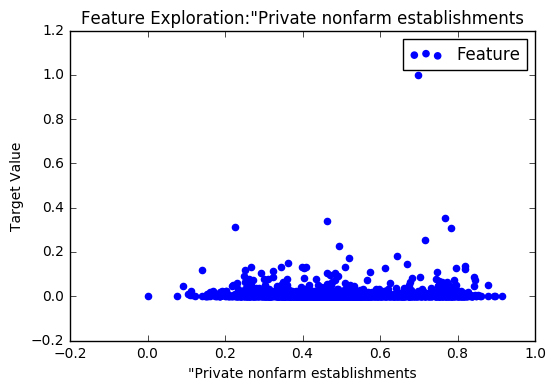

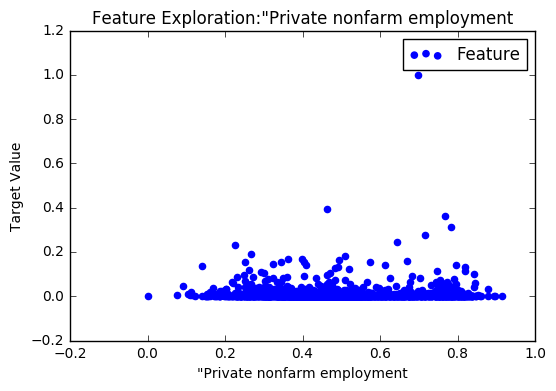

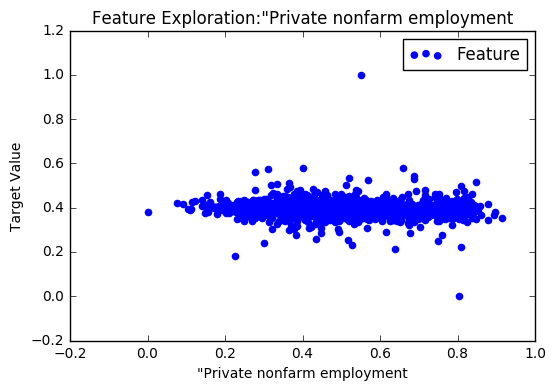

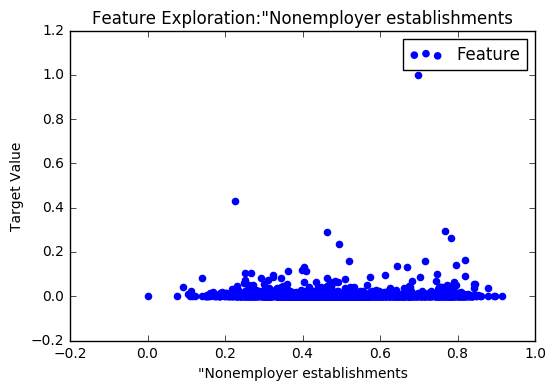

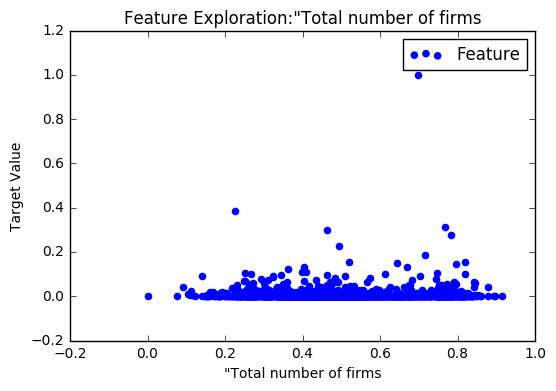

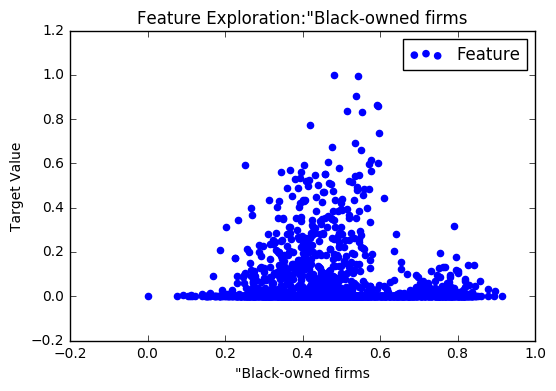

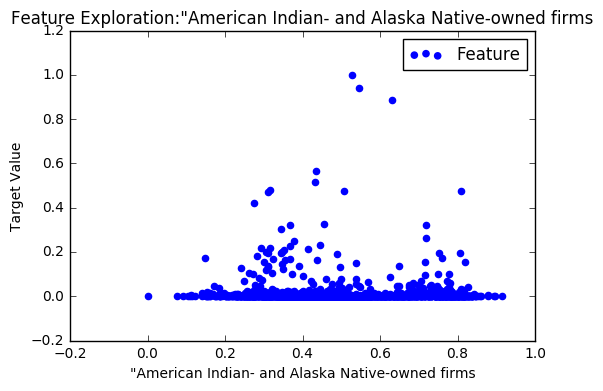

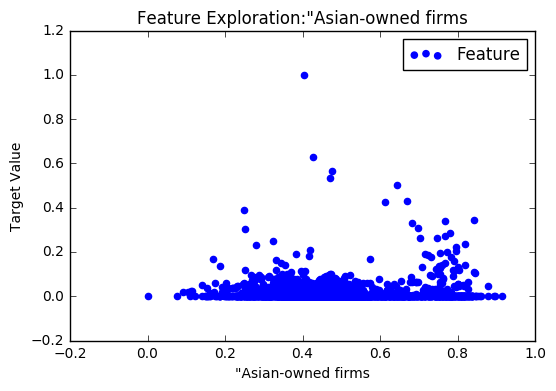

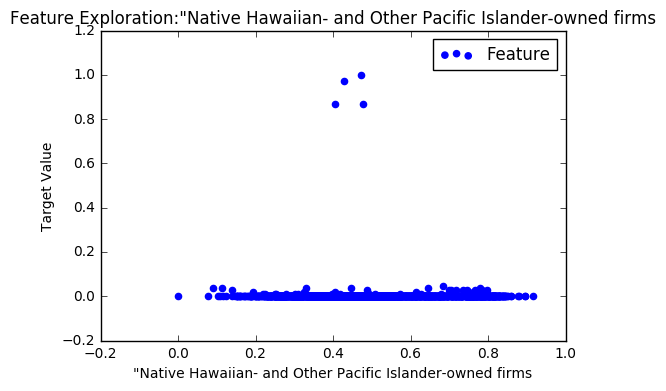

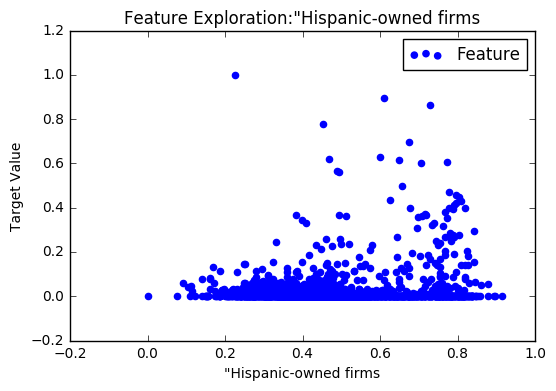

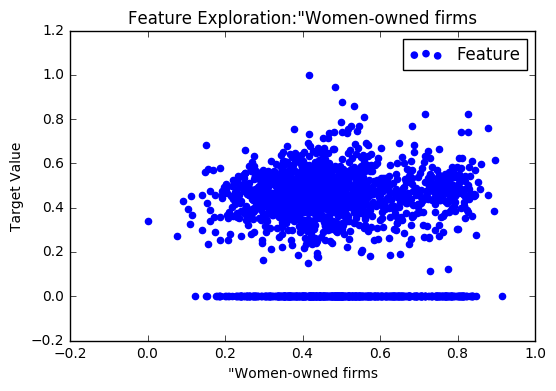

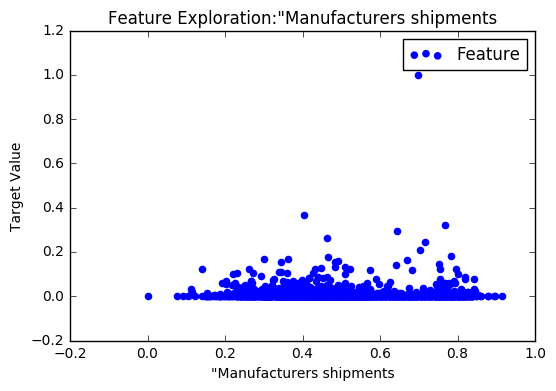

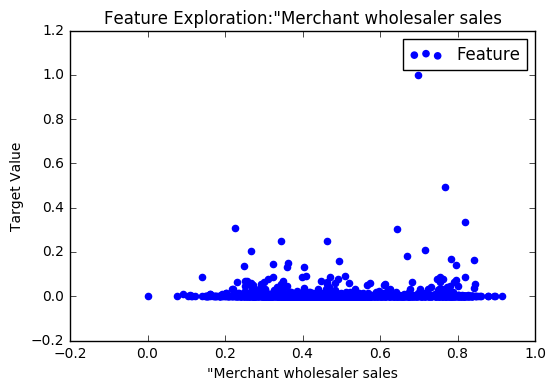

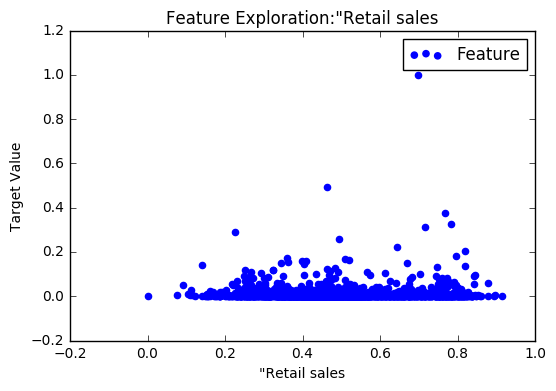

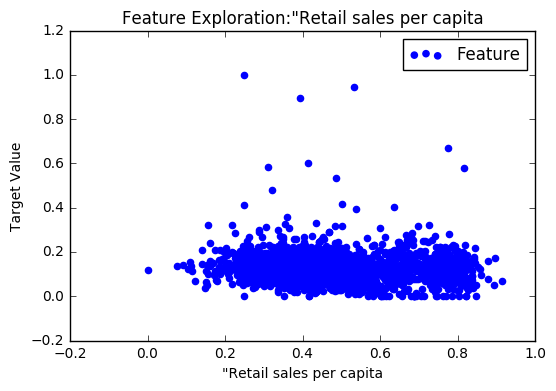

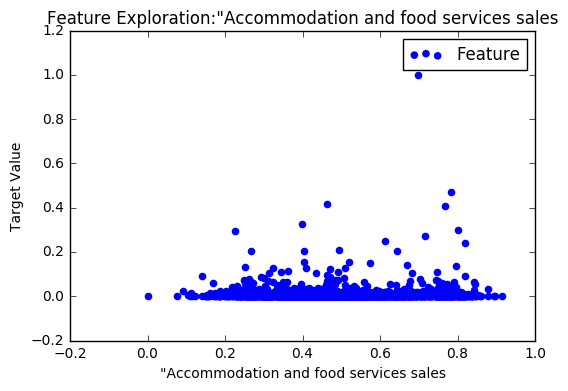

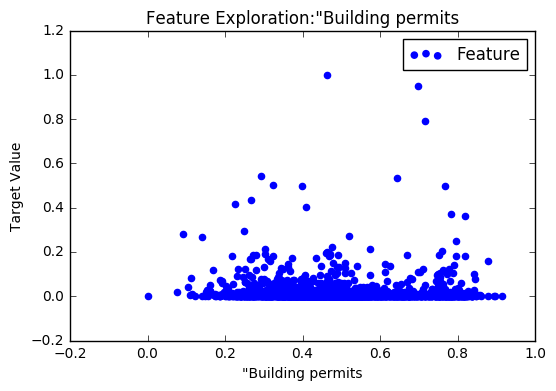

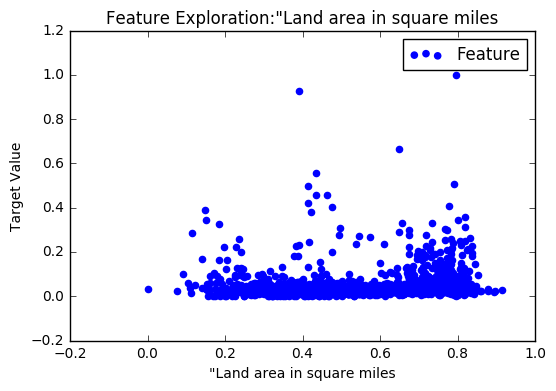

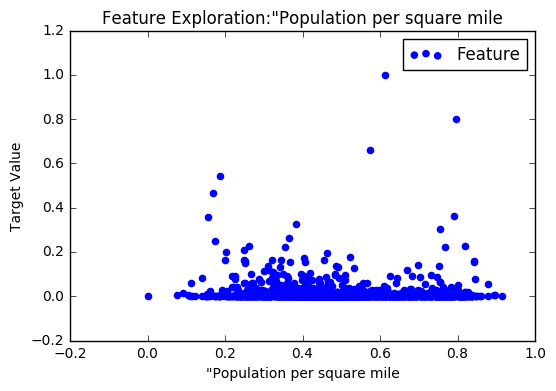

In [15]:
import matplotlib.pyplot as plt
for i in range(len(trainX[0])):
    plt.scatter(trainY,trainX[:,i], color='blue',label='Feature')
    plt.hold('on')
    plt.xlabel(paramdict[cols[i]])
    plt.ylabel('Target Value')
    plt.title('Feature Exploration:' + paramdict[cols[i]])
    plt.legend()
    plt.show()

As we can see by plotting 

# Basic Models:
Here we look at some off-the-shelf models including SVR with three different kernels (Gaussian, linear, and polynomial) and tune their parameters to increase performance using tools from sklearn such as gridsearch.

In [16]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

In [ ]:
models = []
svr = svm.SVR()
# We will use this dictionary of parameter values to test each combination 
# and find the values that optimize performance.
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000], \
              'epsilon':[0.003,0.01,0.03,0.1], 'degree':[3,10,30,100], 'gamma':['auto',0.01,0.1]}
# The example parameter set below is smaller and only intended for debugging.
#parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1,10], 'epsilon':[0.01,0.1], 'degree':[3,10], 'gamma':['auto', 0.01, 0.1]}
svr_model = GridSearchCV(svr, parameters)
svr_model.fit(trainX,trainY)


In [18]:
#svr_model.cv_results_
svr_model.best_score_
svr_model.best_params_
svr_model.best_estimator_
svr_best_model = svr_model.best_estimator_
#print(svr_model.cv_results_['rank_test_score'])
ms = len(svr_model.cv_results_['rank_test_score'])
best_models_params = []
for m in range(ms):
    if(svr_model.cv_results_['rank_test_score'][m] <= 5):
        best_models_params.append(svr_model.cv_results_['params'][m])
#print(svr_model.cv_results_)

In [19]:
# Now we can view how well the best k=5 estimators work on a valiation partition of the training set.

X_train, X_validate, y_train, y_validate = train_test_split(trainX, trainY, test_size=0.4, random_state=0)
#lw = 2

In [20]:
#best_models = []
#colors = ['blue', 'green', 'yellow', 'purple', 'orange']
#for i in range(len(best_models_params)):
#    plt.scatter(range(0,len(y_test)),y_test,color='blue',label='Validation Targets')
#    plt.hold('on')
#    kernel_ = best_models_params[i]['kernel'] if 'kernel' in best_models_params[i].keys() else None
#    C_ = best_models_params[i]['C']
#    epsilon_ = best_models_params[i]['epsilon']
#    if(kernel_ == 'gamma'):
#        gamma_ = best_models_params[i]['gamma']
#        model = svm.SVR(kernel = kernel_, C = C_, epsilon = epsilon_, gamma = gamma_)
#    if(kernel_ == 'poly'):
#        degree_ = best_models_params[i]['degree']
#        model = svm.SVR(kernel = kernel_, C = C_, epsilon = epsilon_, degree = degree_)
#    if(kernel_ == 'linear'):
#        model = svr.SVR(kernel = kernel_, C = C_, epsilon = epsilon_)
#    model.fit(X_train, y_train)
#    prediction = model.predict(X_test)
#    plt.plot(range(0,len(prediction)),prediction,color='red',lw=lw,label = 'Model' + str(i))
#    plt.xlabel('Sample Index')
#    plt.ylabel('Clinton % of vote')
#    plt.title('Primary Validation Set Prediction')
    #plt.legend()
#    plt.show()
parameters = {'C':[1e-5, 1e-2, 1e0, 1e2, 1e5], 'gamma':[0.01, 0.1], 'epsilon':[0.03, 0.3]}
svr = svm.SVR(kernel='rbf')
svr_rbf = GridSearchCV(svr, parameters)
svr_rbf.fit(X_train,y_train)
svr_rbf_model = svr_rbf.best_estimator_

#svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto', epsilon=0.1)
#svr_rbf.fit(X_train,y_train)
#p = svr_rbf.predict(X_test)
#plt.scatter(range(0,len(y_test)),y_test,color='blue',label='Validation Targets')
#plt.hold('on')
#plt.plot(range(0,len(y_test)),y_test,color='red',label='Validation Targets')
#plt.xlabel('Sample Index')
#plt.ylabel('Clinton % of vote')
#plt.title('Primary Validation Set Prediction')
#plt.legend()
#plt.show()

    
    
    

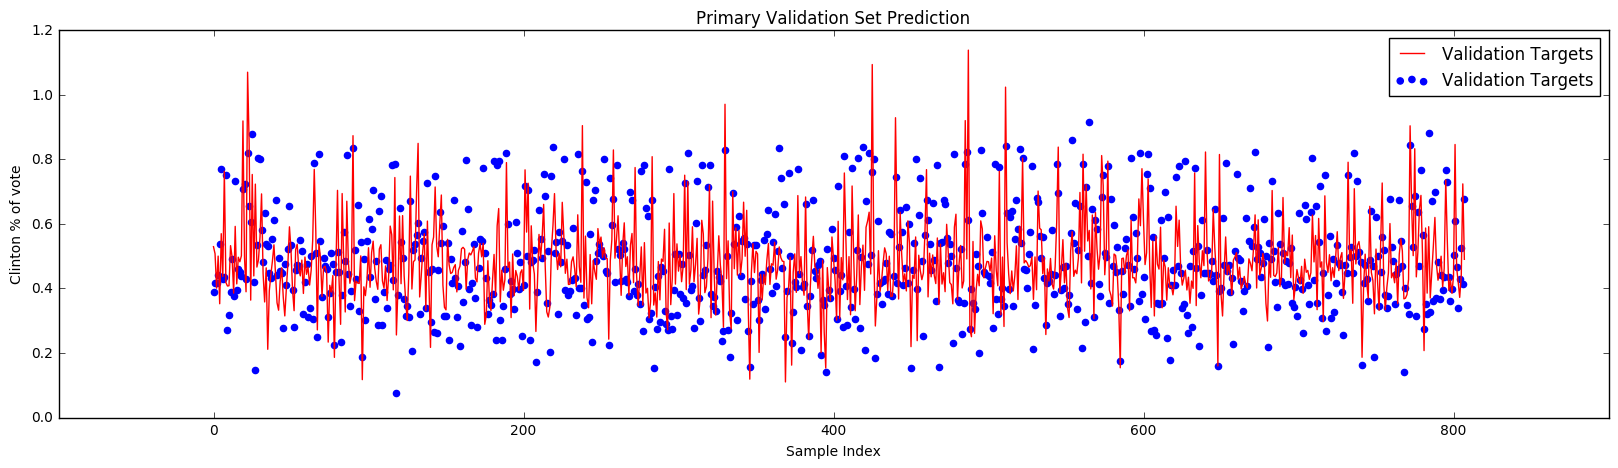

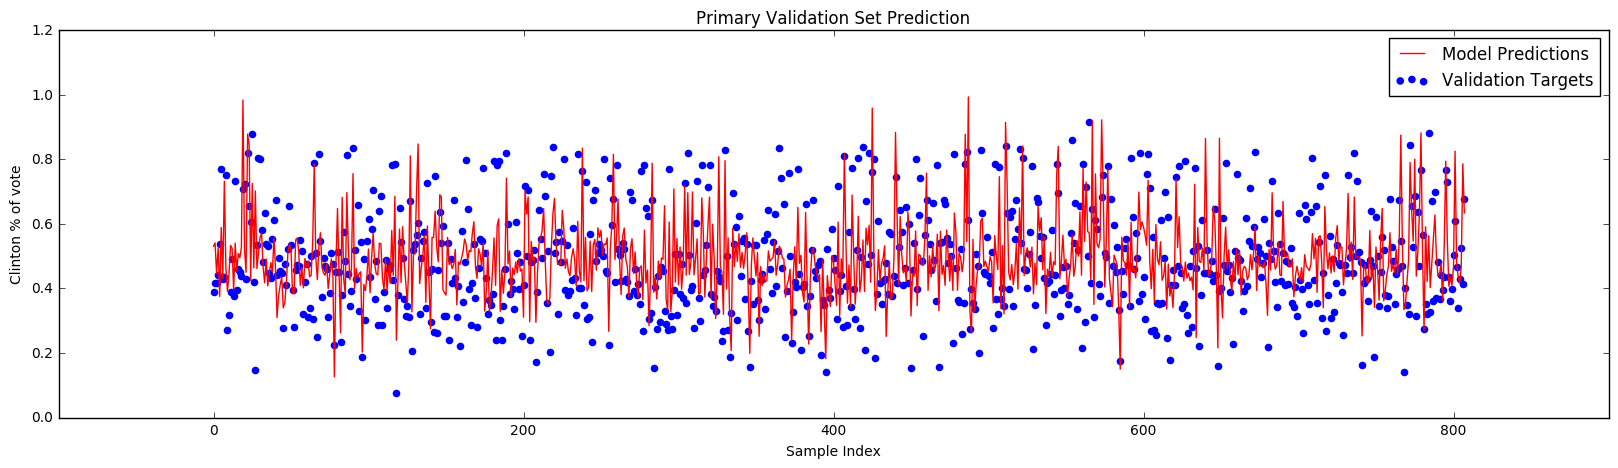

In [26]:
predictions = []
prediction = svr_rbf_model.predict(X_validate)
plt.figure(1, figsize=(20,5))
plt.scatter(range(0,len(y_validate)),y_validate,color='blue',label='Validation Targets')
plt.hold('on')
plt.plot(range(0,len(prediction)),prediction,color='red',label='Validation Targets')
plt.xlabel('Sample Index')
plt.ylabel('Clinton % of vote')
plt.title('Primary Validation Set Prediction')
plt.legend()
plt.show()
predictions.append([prediction,'Gaussian SVR'])


svr_rbf = svm.SVR(kernel='rbf', C=1e3, gamma='auto', epsilon=0.1)
svr_rbf.fit(X_train,y_train)
p = svr_rbf.predict(X_validate)
plt.figure(figsize = (20,5))
plt.scatter(range(0,len(y_validate)),y_validate,color='blue',label='Validation Targets')
plt.hold('on')
plt.plot(range(0,len(p)),p,color='red',label='Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Clinton % of vote')
plt.title('Primary Validation Set Prediction')
plt.legend()
plt.show()
predictions.append([p, 'Gaussian SVR'])

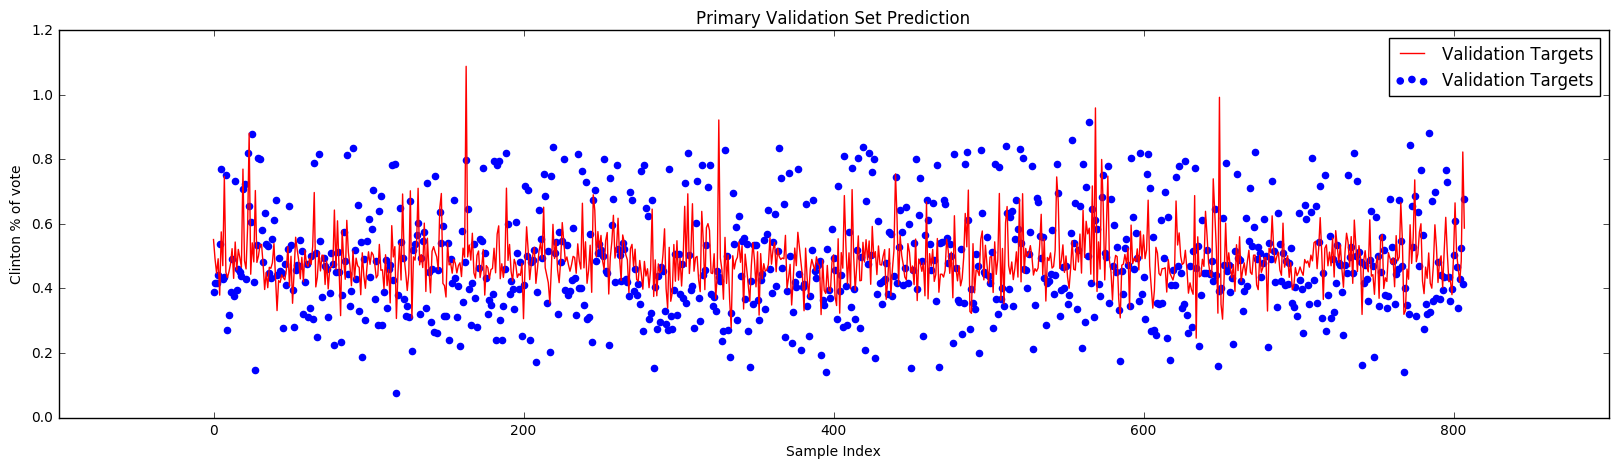

In [27]:
# Logistic and Ridge regression models. 
ridge = linear_model.Ridge(fit_intercept=True, random_state=0, normalize=True)
ridge = linear_model.Ridge()
#parameters = {'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5], \
#              'max_iter':[100, 1000, 10000]}
#parameters = {'alpha':[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]}
parameters = {'alpha':[0.001,0.003,0.01,0.03,0.1,0.3,1,3]}
ridge_model = GridSearchCV(ridge, parameters)
ridge_model.fit(X_train,y_train)
#ridge_model.get_params().keys()
#ridge_model.fit(trainX,trainY)
#print(ridge_model.params)
prediction = ridge_model.predict(X_validate)
#print(X_validate)
#print(len(y_validate))
plt.figure(1, figsize=(20,5))
plt.scatter(range(0,len(y_validate)),y_validate,color='blue',label='Validation Targets')
plt.hold('on')
plt.plot(range(0,len(prediction)),prediction,color='red',label='Validation Targets')
plt.xlabel('Sample Index')
plt.ylabel('Clinton % of vote')
plt.title('Primary Validation Set Prediction')
plt.legend()
plt.show()
#prediction
predictions.append([prediction, 'Ridge Regression'])

Total Predicted Counties: 808
               Baseline  Gaussian SVR  Gaussian SVR  Ridge Regression
Dist True                                                            
(0.0, 0.025)         97           166           147               107
(0.025, 0.05)       112           132           124               102
(0.05, 0.075)        82           118            93               106
(0.075, 0.1)         73            91           104               108
(0.1, 0.125)         75            62            93                95
(0.125, 0.15)        62            52            60                70
(0.15, 0.175)        63            37            45                47
(0.175, 0.2)         55            40            33                38
(0.2, 0.225)         34            28            37                34
(0.225, 0.25)        34            33            24                42
(0.25, 0.275)        32            10            15                21
(0.275, 0.3)         35            15            15         

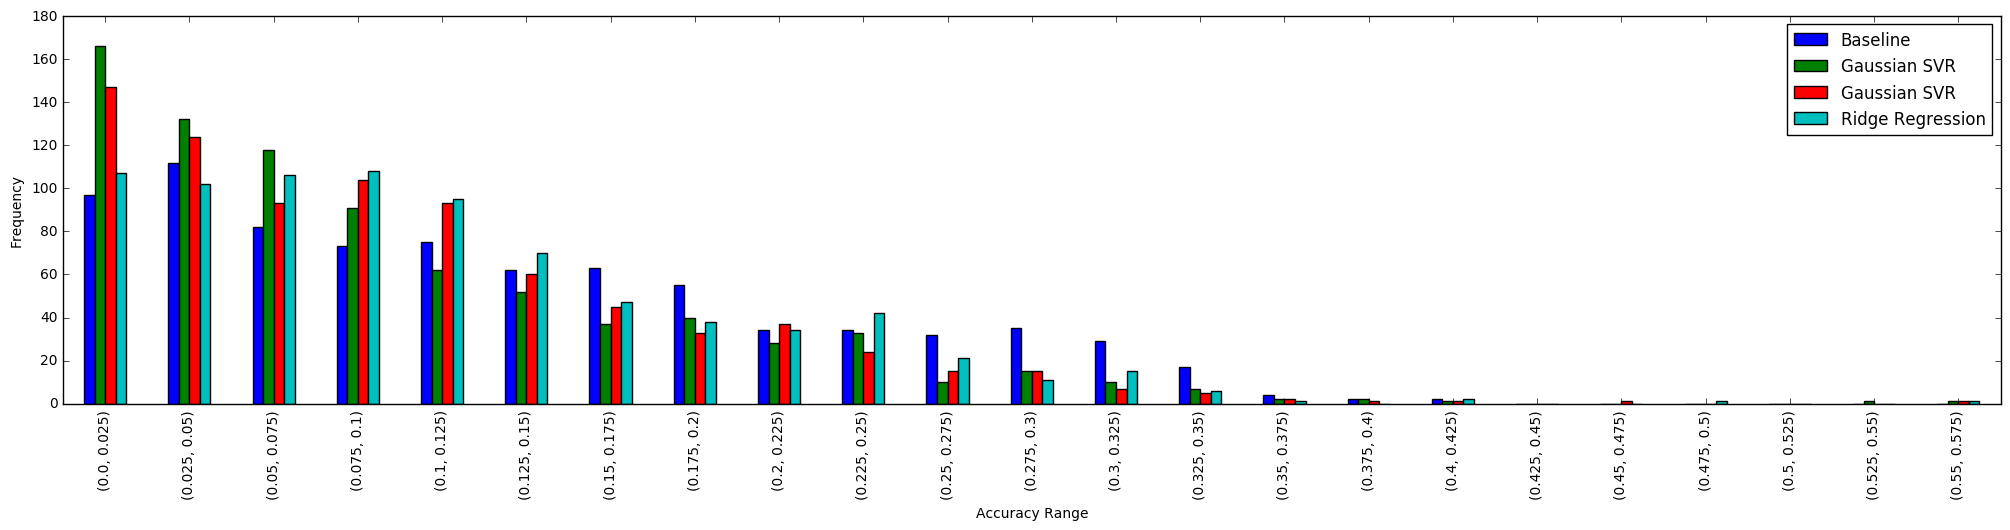

In [31]:
freq_table = obs_acc_freq(y_validate, predictions)
print('Total Predicted Counties: ' + str(len(y_validate)))
print(freq_table)
freq_table = freq_table.drop(freq_table.index[range(23,40)])
plt.figure(1,figsize=(25,5))
ax = freq_table.plot(kind='bar', figsize=(25,5),)
ax.set_xlabel('Accuracy Range')
ax.set_ylabel("Frequency")
plt.show()

# Ensembles
We can now build an ensemble using the k best scoring combinations of parameters and averaging them. One method of doing this would be to make a prediction using a voting system where each model gets votes proportional to their rank in the accuracy hierarchy.
Because having models that are 

In [ ]:
from sklearn.ensemble import BaggingRegressor

temp_Xtrain = Xtrain.copy()
temp_Ytrain = Ytrain.copy()
n_repeat = 8
n_train = 200
n_test = 400
estimators = 
n_estimators = 
X_train = []
y_train = []

for i in range(n_repeat):
    X = []
    y = []
    for j in range(n_train):
        r = random.choice(range(len(temp_Xtrain)))
        X.append(temp_Xtrain[r])
        y.append(temp_Ytrain[r])
    X_train.append(X)
    y_train.append(y)
    


                    
        